<a href="https://colab.research.google.com/github/sarmilaPS/Forest_Conversion/blob/main/Forest_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Data Analysis on Forest Area of World

## Objective

The primary objective of working on this project is to know how and to what extent people around the world are cleaning natural forests to use the land for other purpose often agricultural (growing crops like palm oil or creating pasture for cattle), but also for mines, infrastructure or urbanisation.

Forest conversion is the largest cause of global deforestation today.



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Displaying dataset from the source csv file

In [4]:
forest = pd.read_csv('drive/MyDrive/bootcamp/forest.csv')
forest.head()

,entity,code,year,net_forest_conversion
0,Algeria,DZA,1990,-8800
1,Algeria,DZA,2000,33900
2,Algeria,DZA,2010,7600
3,Algeria,DZA,2015,-1400
4,Argentina,ARG,1990,-182600


## Data Description

1. **entity** = Country
2. **code** = Country Code
3. **year** = Year
4. **net_forest_conversion** = Net forest conversion in hectares

The provided data source has 475 rows and 4 columns.

In [5]:
forest.shape

(469, 4)

In [6]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   entity                 469 non-null    object
 1   code                   469 non-null    object
 2   year                   469 non-null    int64 
 3   net_forest_conversion  469 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 14.8+ KB


In [7]:
forest.nunique()

entity                   130
code                     130
year                       4
net_forest_conversion    311
dtype: int64

In [8]:
forest["year"].value_counts()

2010    126
2015    120
2000    120
1990    103
Name: year, dtype: int64

On this dataset, we see mean, standard deviation, minimum hectares and maximum hectares of conversion i.e. -7.693103e+04, 6.393444e+05, -7.818000e+06, 2.360980e+06 hectares respectively.

In [9]:
forest.net_forest_conversion.describe()

count    4.690000e+02
mean    -2.911778e+04
std      3.559493e+05
min     -3.950790e+06
25%     -3.000000e+04
50%      0.000000e+00
75%      3.420000e+03
max      2.360980e+06
Name: net_forest_conversion, dtype: float64

## Cleaning the dataset

Originally the dataset was corrupted. The following data has been been cleaned manually.
1. The country name "Vatican" is enlisted in this dataset. But this is not a country. Rather it is a city in Rome, Italy. And the row consists of 0 value.
2. The country name "World" is also enlisted herewith. Also it is not a country, the row has to be deleted from the dataset because while doing mapping with the continent it shows error as this name "World" is not enlisted in the "**pycountry_convert**" module.
3. The country code of "French Guyana" and "Faroe Islands" has updated and the spelling of "French Guyana" has been replaced by "French Guiana"

In [10]:
forest.isnull().sum()

entity                   0
code                     0
year                     0
net_forest_conversion    0
dtype: int64

## Data Visualization

This dataset shows top 5 countries in year 2010 where China, Australia, United States, India, and chile were priortizing the forest conservation as main agenda in order to reduce converting forest land to other agricultural purposes.

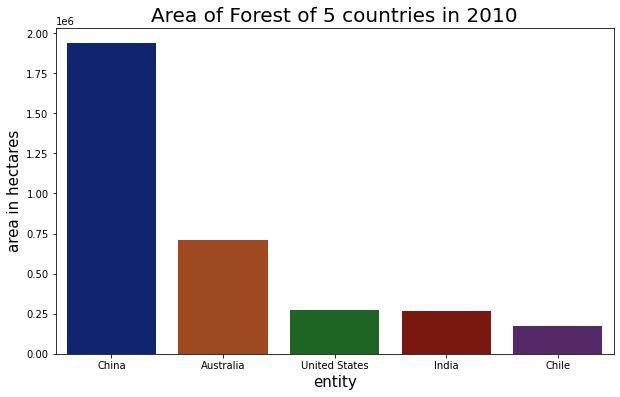

In [11]:
current_2010 = forest[forest['year']==2010][:130]
current_2010.sort_values("net_forest_conversion", ascending = False, inplace = True)

plt.rcParams['figure.figsize'] = (10, 6)
ax = sns.barplot(x = current_2010['entity'][:5], y = current_2010['net_forest_conversion'][:5], palette = 'dark')
ax.set_xlabel(xlabel = 'entity', fontsize = 15)
ax.set_ylabel(ylabel = 'area in hectares', fontsize = 15)
ax.set_title(label = 'Area of Forest of 5 countries in 2010', fontsize = 20)
plt.xticks(rotation = 360)
plt.show()

#### Data of 4 different years

Out of four survery done in year (1990, 2000, 2010, and 2015), the dataset picturizes gradually in the year 2010 and 2015 forest conversion activity is comparatively low.

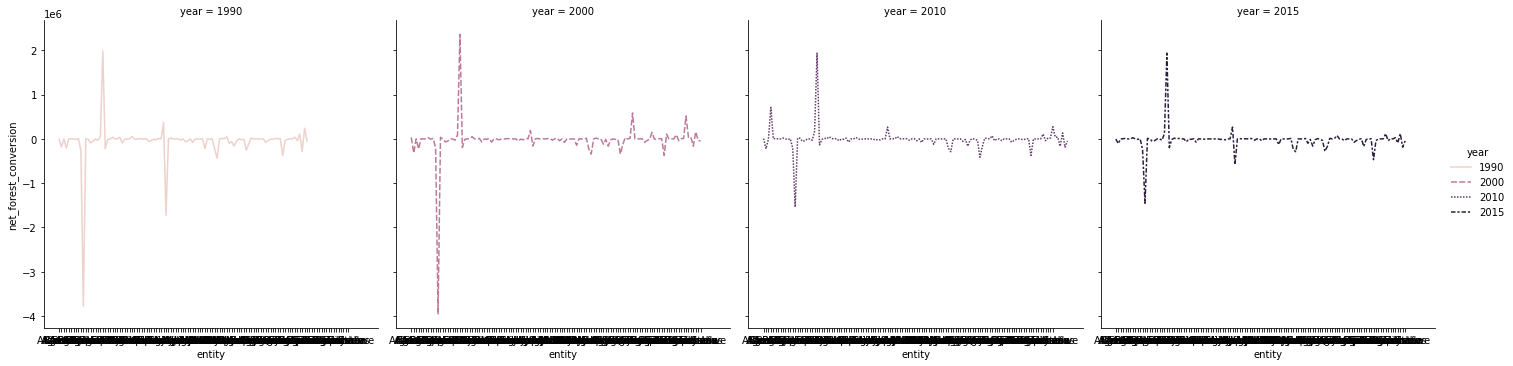

In [12]:
sns.relplot(
    data=forest, x="entity", y="net_forest_conversion",
    col="year", hue="year", style="year",
    kind="line"
)

In [13]:
df_forest = forest.drop(["code", "year"], axis = 1)
df_forest.sort_values("net_forest_conversion", ascending = False, inplace = True)
df_forest.head()

,entity,net_forest_conversion
82,China,2360980
81,China,1986000
84,China,1936790
83,China,1936770
14,Australia,709680


#### Top 10 countries in preserving forest area

It shows list of sum of four surveys of top 10 countries (China, India, United States, Veitnam, Russia, Chile, Turkey, Australia, Spain, and Cuba) that are in the process of forest conservation to make itself the country rich in forest resources.

In [14]:
top_10 = df_forest.groupby(["entity"]).sum()
top_10.sort_values("net_forest_conversion", ascending= False, inplace = True)
first_10_countries = top_10.head(10)
first_10_countries.head(10)

,net_forest_conversion
entity,
China,8220540
India,1088600
United States,902000
Vietnam,652220
Russia,621910
Chile,445000
Turkey,357410
Australia,276070
Spain,150510


[]

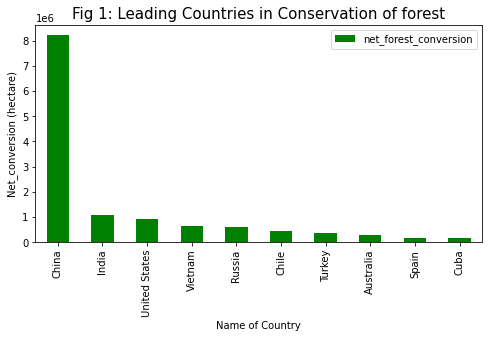

In [15]:
first_10_countries.plot(kind = 'bar', figsize = (8, 4), color = 'green')
plt.xlabel('Name of Country',fontsize =10)
plt.ylabel('Net_conversion (hectare)', fontsize=10)
plt.title('Fig 1: Leading Countries in Conservation of forest',fontsize = 15)

plt.plot()

#### Top 10 countries in converting forest area to other purposes

It shows list of sum of four surveys of top 10 countries (Brazil, Indonesia, Tanzania, Myanmar, Paraguay, Bolivia, Mozambique, Argentina, Colombia, and Venezuala) that are in the process of forest conversion demolishing the existing forest area to use in agricultural purpose or urbanization or cattle grazing etc. 

In [16]:
top_10.sort_values("net_forest_conversion", ascending= True, inplace = True)
last_10 = top_10.head(10)
last_10.head(10)

,net_forest_conversion
entity,
Brazil,-10723950
Indonesia,-2467520
Tanzania,-1585000
Myanmar,-1357120
Paraguay,-1291150
Bolivia,-922320
Mozambique,-886270
Argentina,-827200
Colombia,-748210


[]

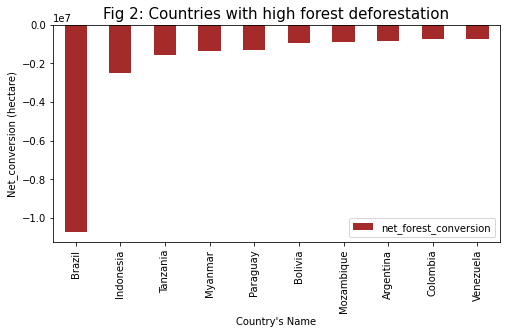

In [17]:
last_10.plot(kind = 'bar', figsize = (8, 4), color = 'brown')
plt.xlabel("Country's Name", fontsize=10)
plt.ylabel("Net_conversion (hectare)", fontsize=10)

plt.title('Fig 2: Countries with high forest deforestation', fontsize = 15)
plt.plot()

#### Converting top 5 countries in pivot table

In [18]:
import csv
f = open("drive/MyDrive/bootcamp/forest.csv")
csv_f = csv.reader(f)
top_5_country = []

for row in csv_f:
  if row[0] == "China" or row[0] =="India" or row[0] == "United States" or row[0]== "Vietnam" or row[0]=="Russia":
    top_5_country.append(row);
    print (row)
print (top_5_country)

['China', 'CHN', '1990', '1986000']
['China', 'CHN', '2000', '2360980']
['China', 'CHN', '2010', '1936770']
['China', 'CHN', '2015', '1936790']
['India', 'IND', '1990', '365300']
['India', 'IND', '2000', '190500']
['India', 'IND', '2010', '266400']
['India', 'IND', '2015', '266400']
['Russia', 'RUS', '1990', '0']
['Russia', 'RUS', '2000', '586710']
['Russia', 'RUS', '2010', '-41030']
['Russia', 'RUS', '2015', '76230']
['United States', 'USA', '1990', '108600']
['United States', 'USA', '2000', '518400']
['United States', 'USA', '2010', '275000']
['United States', 'USA', '2015', '0']
['Vietnam', 'VNM', '1990', '240810']
['Vietnam', 'VNM', '2000', '160400']
['Vietnam', 'VNM', '2010', '134760']
['Vietnam', 'VNM', '2015', '116250']
[['China', 'CHN', '1990', '1986000'], ['China', 'CHN', '2000', '2360980'], ['China', 'CHN', '2010', '1936770'], ['China', 'CHN', '2015', '1936790'], ['India', 'IND', '1990', '365300'], ['India', 'IND', '2000', '190500'], ['India', 'IND', '2010', '266400'], ['Indi

In [19]:
forest_df_top5 = pd.DataFrame(top_5_country,columns=["entity","code","year","net_forest_conversion"])
forest_df_top5.head()

,entity,code,year,net_forest_conversion
0,China,CHN,1990,1986000
1,China,CHN,2000,2360980
2,China,CHN,2010,1936770
3,China,CHN,2015,1936790
4,India,IND,1990,365300


In [20]:
forest_df_top5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   entity                 20 non-null     object
 1   code                   20 non-null     object
 2   year                   20 non-null     object
 3   net_forest_conversion  20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes


In [21]:
forest_df_top5['net_forest_conversion'] = forest_df_top5.net_forest_conversion.astype(int)
forest_df_top5['year'] = forest_df_top5.year.astype(int)


In [22]:
forest_df_top5.to_excel("new_data_forest.xlsx",sheet_name='top_5_countries')  

In [23]:
forest_df_top5.pivot(index="year", columns="entity", values="net_forest_conversion")
forest_df_top5

,entity,code,year,net_forest_conversion
0,China,CHN,1990,1986000
1,China,CHN,2000,2360980
2,China,CHN,2010,1936770
3,China,CHN,2015,1936790
4,India,IND,1990,365300
5,India,IND,2000,190500
6,India,IND,2010,266400
7,India,IND,2015,266400
8,Russia,RUS,1990,0
9,Russia,RUS,2000,586710


#### Visualizing data of top 5 countries through seaborn

It shows the position of country in different years about how far it is upgrading or degrading the forest conservation plan.

Text(0.5, 1.0, 'Fig 3: Yearly data of Top 5 Countries')

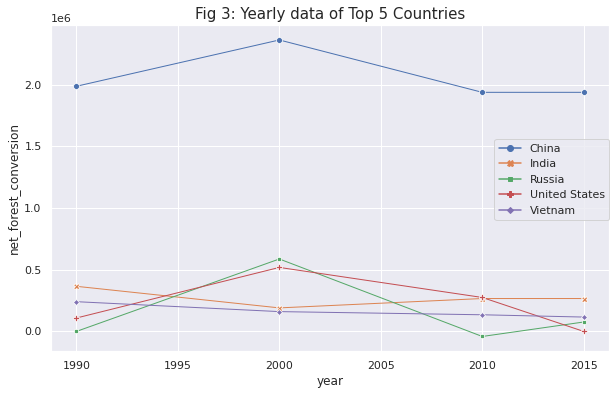

In [24]:
sns.set(style="darkgrid")
sns.lineplot(data=forest_df_top5, x="year", y="net_forest_conversion", hue="entity", style="entity", markers=True, dashes=False, ci=68, lw=1)
plt.legend(bbox_to_anchor=(1, 0.65), loc=1, borderaxespad=0.)
plt.title("Fig 3: Yearly data of Top 5 Countries", fontsize = 15
          )

## Installing module for data manipulation

In [25]:
pip install pycountry_convert

     |████████████████████████████████| 10.1MB 18.9MB/s 
     |████████████████████████████████| 245kB 29.3MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=88ae321081456779f2ade35c0cfa952046ca35f86dc945244284c93e3bc2e4c2
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.5 which is incompatible.
ERROR: pytest-mock 3.6.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.12.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.

####Addition of new Column - continent

In [26]:
import csv
import pycountry_convert as pc
# import pandas as pd
f = open("drive/MyDrive/bootcamp/forest.csv")
csv_f = csv.reader(f)
csv_f_with_continent_name = []
country_name = forest.entity.unique()

for row in csv_f:
  if row[1] != "code" and len(row[1]) == 3:
    alpha2 = pc.country_alpha3_to_country_alpha2(row[1])
    # print(alpha2)
    code_continent = pc.country_alpha2_to_continent_code(alpha2)
    name_continent = pc.convert_continent_code_to_continent_name(code_continent)
    row.append(name_continent)
    csv_f_with_continent_name.append(row);
print(csv_f_with_continent_name)

[['Algeria', 'DZA', '1990', '-8800', 'Africa'], ['Algeria', 'DZA', '2000', '33900', 'Africa'], ['Algeria', 'DZA', '2010', '7600', 'Africa'], ['Algeria', 'DZA', '2015', '-1400', 'Africa'], ['Argentina', 'ARG', '1990', '-182600', 'South America'], ['Argentina', 'ARG', '2000', '-316400', 'South America'], ['Argentina', 'ARG', '2010', '-223400', 'South America'], ['Argentina', 'ARG', '2015', '-104800', 'South America'], ['Aruba', 'ABW', '1990', '0', 'North America'], ['Aruba', 'ABW', '2000', '0', 'North America'], ['Aruba', 'ABW', '2010', '0', 'North America'], ['Aruba', 'ABW', '2015', '0', 'North America'], ['Australia', 'AUS', '1990', '-206810', 'Oceania'], ['Australia', 'AUS', '2000', '-226800', 'Oceania'], ['Australia', 'AUS', '2010', '709680', 'Oceania'], ['Austria', 'AUT', '1990', '6250', 'Europe'], ['Austria', 'AUT', '2000', '2510', 'Europe'], ['Austria', 'AUT', '2010', '3600', 'Europe'], ['Austria', 'AUT', '2015', '3590', 'Europe'], ['Azerbaijan', 'AZE', '2010', '9080', 'Asia'], ['

#### Converting list of array to dataframe

In [27]:
data = pd.DataFrame(csv_f_with_continent_name,columns=["entity","code","year","net_forest_conversion","continent"])
data.head()

,entity,code,year,net_forest_conversion,continent
0,Algeria,DZA,1990,-8800,Africa
1,Algeria,DZA,2000,33900,Africa
2,Algeria,DZA,2010,7600,Africa
3,Algeria,DZA,2015,-1400,Africa
4,Argentina,ARG,1990,-182600,South America


In [28]:
data.to_excel("new_data_forest_continent_wise.xlsx",sheet_name='continent')  

#### Validating its datatype

In [29]:
data.dtypes

entity                   object
code                     object
year                     object
net_forest_conversion    object
continent                object
dtype: object

In [30]:
data['net_forest_conversion'] = data.net_forest_conversion.astype(int)
data['year'] = data.year.astype(int)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   entity                 469 non-null    object
 1   code                   469 non-null    object
 2   year                   469 non-null    int64 
 3   net_forest_conversion  469 non-null    int64 
 4   continent              469 non-null    object
dtypes: int64(2), object(3)
memory usage: 18.4+ KB


In [32]:
data_continent_7 = data.groupby(["continent"]).sum()
data_continent_7.sort_values("net_forest_conversion", ascending=False, inplace=True)
data_continent_7

,year,net_forest_conversion
continent,,
Asia,178375,6584100
Europe,238640,1496440
Oceania,38060,246050
North America,142255,-361650
Africa,234495,-5996980
South America,108205,-15624200


In [33]:
data_continent_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Asia to South America
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   year                   6 non-null      int64
 1   net_forest_conversion  6 non-null      int64
dtypes: int64(2)
memory usage: 144.0+ bytes


#### Visualizing dataset continent wise

This dataset show status of forest conservation with respect to its continent. This represents Asia is leading in being richest continent in forest resources.

[]

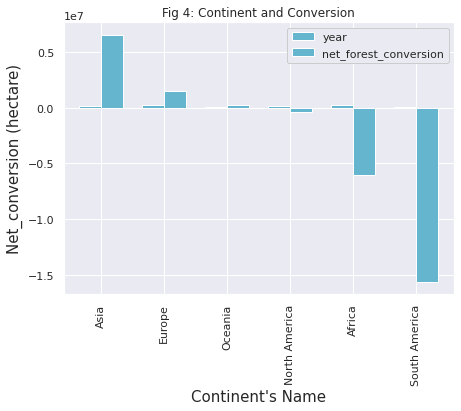

In [34]:
data_continent_7.plot(kind = 'bar', figsize = (7, 5), width = 0.7, color ="c" )
plt.xlabel("Continent's Name", fontsize=15)
plt.ylabel("Net_conversion (hectare)", fontsize=15)

plt.title('Fig 4: Continent and Conversion')
plt.legend(framealpha=1, frameon=True);
plt.plot()
# "#4CAF50"

# Conclusion


This dataset is the real picture of the world where one can see how the people around the world are preserving, and maintaining the existing natural resources. The conclusions we see from this dataset are : 
1. China is the leading country where people are aware of plantations. Although there is no speedy up-gradation, people are likely to take care of the resources given by nature.
2. South America is considered to be one of the developed continents. But seeing this picture, we can assume that only being a developed continent is not enough, one should have self-realization about savings of what they have. Out of 10 countries where deforestation is high, 6 countries (Brazil, Bolivia, Argentina, Venezuela, Colombia, Paraguay) are converting forest areas to other purposes.



